In [112]:
import numpy as np
import matplotlib.pyplot as plt

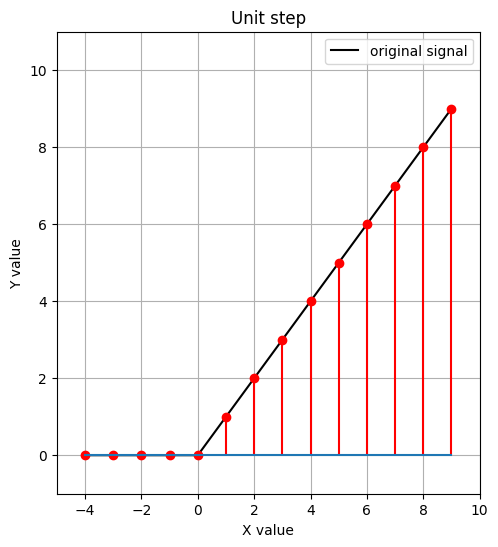

In [113]:
n=np.arange(-4,10,1)
t=np.linspace(0,1,1000)
x=np.where(n>=0,n,0)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Unit step")
plt.xlabel("X value")
plt.ylabel("Y value")
plt.axis([-5,10,-1,11])
plt.grid(True)
plt.plot(n,x,'k',label='original signal')
plt.stem(n,x,linefmt='r-',markerfmt='ro',basefmt='')
plt.legend()

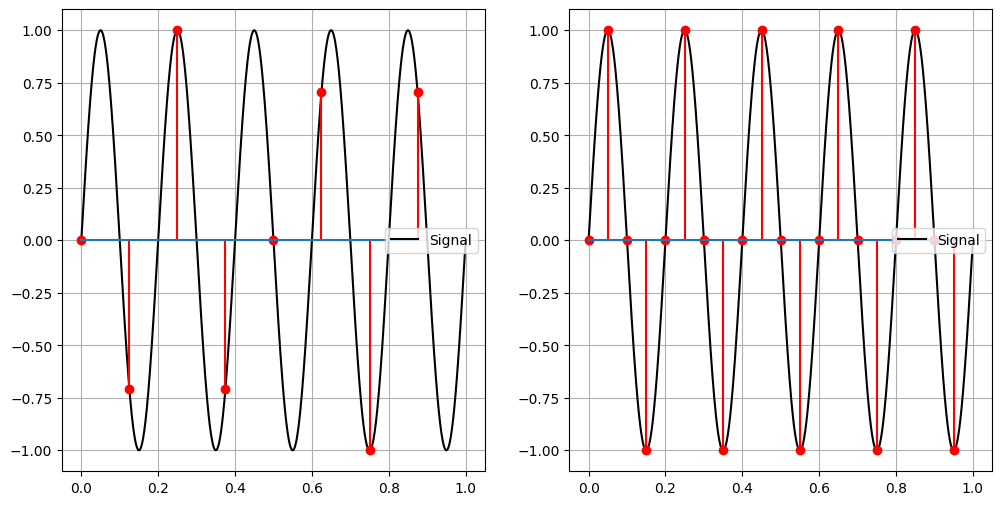

In [114]:
f=5
t=np.linspace(0,1,1000)
sin=np.sin(2*np.pi*f*t)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(t,sin,'k',label='Signal')
plt.grid(True)


fs1=8
fs2=20

n1=np.arange(0,1,1/fs1)

sin1=np.sin(2*np.pi*f*n1)

plt.stem(n1,sin1,linefmt='r-',markerfmt='ro',basefmt='')
plt.legend()





plt.subplot(1,2,2)
plt.plot(t,sin,'k',label='Signal')
plt.grid(True)

n1=np.arange(0,1,1/fs2)

sin1=np.sin(2*np.pi*f*n1)

plt.stem(n1,sin1,linefmt='r-',markerfmt='ro',basefmt='')
plt.legend()

[1 1 1 1 1 0 0 0 0 0]
[0 1 2 3 4 5 6 7 8 9]


<StemContainer object of 3 artists>

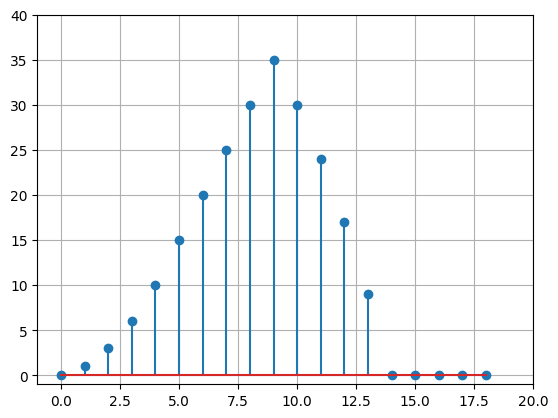

In [115]:
def unit(x):
    n=np.where(x>=0,1,0)
    return n

def convo(x,h):
    len_x=len(x)
    len_h=len(h)
    len_y=len_h+len_x-1
    y=np.zeros(len_y)
    for i in range (len_y):
        for j in range (len_x):
            if(i-j>=0 and i-j<len_h):
                y[i]+=x[j]*h[i-j];
    return y
        
    


x=np.arange(0,10)
u=unit(x)-unit(x-5)

print(u)
print(x)
# y=np.convolve(x,u)

y=convo(x,u)
plt.grid(True)
plt.axis([-1,20,-1,40])
plt.stem(y)

[ 3  8 -6 25 -4  8  8]


<StemContainer object of 3 artists>

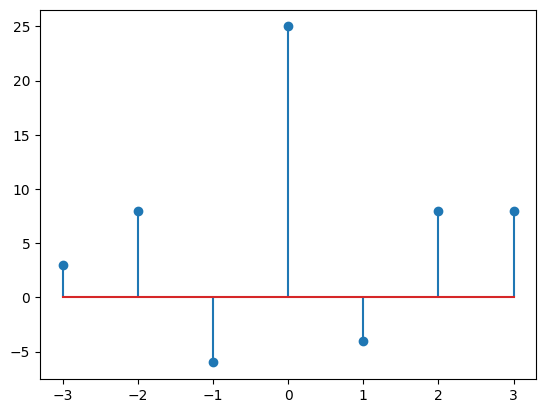

In [ ]:

def correl(x,y):
    len_x=len(x)
    len_y=len(y)
    len_r=len_y+len_x-1
    pad_y=np.pad(y,(len_x-1,len_x-1),'constant')
    # r=np.zeros(r_pad)
    r=np.zeros(len_r)
    for i in range(len_r):
        for j in range(len_x):
            r[i]+=x[j]*pad_y[i+j]

    return r;


# x=np.array({1,3,-2,4})
x=[1,3,-2,4]
y=[2,3,-1,3]
z=[2,-1,4,-2]
# print(x)
R_xy=correl(x,y)
# R_xy=np.correlate(x,y,mode='full')
print(R_xy)
X_xy=np.arange(-(len(y)-1),len(x))
plt.stem(X_xy,R_xy)


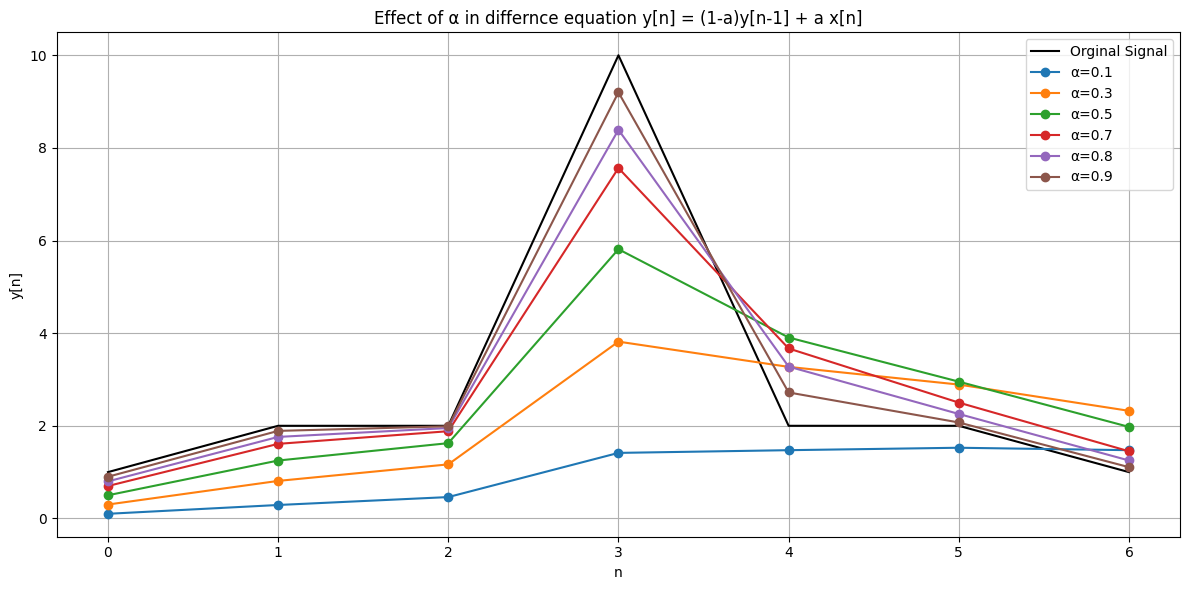

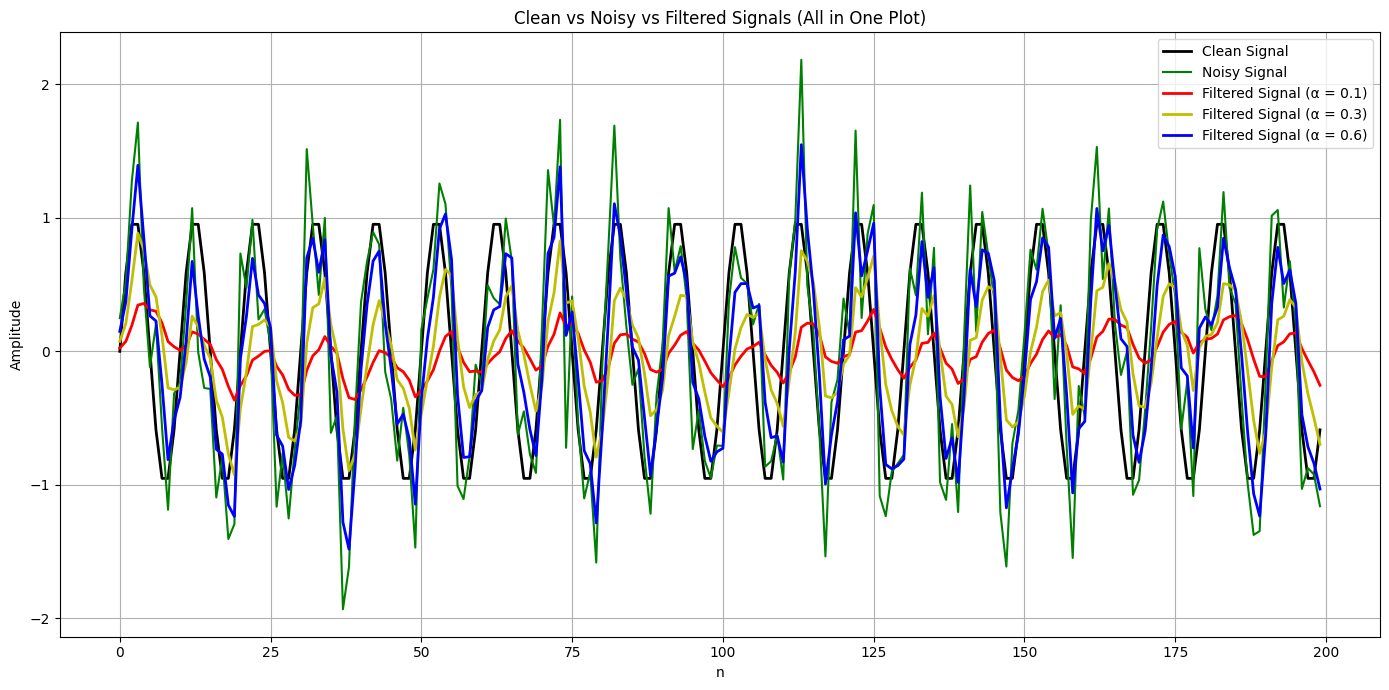

In [123]:
#Problem-1 
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([1,2,2,10,2,2,1])
n = len(x)

alpha_values = [0.1,0.3,0.5,0.7,0.8,0.9]

results = { }

for a in alpha_values:
    y = np.zeros(n)
    for i in range(n):
        if i == 0:
            y[i] = a * x[i]  
        else:
            y[i] = (1 - a) * y[i - 1] + a * x[i]

    results[a] = y
    
plt.figure(figsize=(12,6))

plt.plot(x,'black',label='Orginal Signal')

for a,y in results.items():
     plt.plot(y, label=f'α={a}', marker='o')


plt.title("Effect of α in differnce equation y[n] = (1-a)y[n-1] + a x[n]")
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#problem-2

import numpy as np
import matplotlib.pyplot as plt

#clean
n = np.arange(0, 200)
frequency = 0.1
clean_signal = np.sin(2 * np.pi * frequency * n)

#clean+noise
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=n.shape)
noisy_signal = clean_signal + noise

#filter
alpha_values = [0.1,0.3,0.6]
colors = ['r','y','b']
filtered_signals = {}

for a in alpha_values:
    y = np.zeros_like(noisy_signal)
    for i in range(len(n)):
        if i == 0:
            y[i] = a * noisy_signal[i]
        else:
            y[i] = (1 - a) * y[i - 1] + a * noisy_signal[i]
    filtered_signals[a] = y

plt.figure(figsize=(14, 7))

plt.plot(n, clean_signal, label='Clean Signal', linewidth=2, color='black')
plt.plot(n, noisy_signal, label='Noisy Signal',color='green')
i=0
for alpha, y in filtered_signals.items():
    plt.plot(n, y, label=f'Filtered Signal (α = {alpha})', linewidth=2,color=colors[i] )
    i=i+1

plt.title('Clean vs Noisy vs Filtered Signals (All in One Plot)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
